<a href="https://colab.research.google.com/github/mythili2005/Malaria-prediction-using-deep-learning/blob/main/DL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 97% 654M/675M [00:07<00:00, 80.4MB/s]
100% 675M/675M [00:07<00:00, 89.7MB/s]


In [ ]:
!unzip /content/cell-images-for-detecting-malaria.zip -d "/content/drive/MyDrive/dl mini"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dl mini/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: /content/drive/MyDrive/dl mini/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: /content/drive/MyDrive/dl mini/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: /content/drive/MyDrive/dl mini/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: /content/drive/MyDrive/dl mini/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: /content/drive/MyDrive/dl mini/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: /content/drive/MyDrive/dl mini/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: /content/drive/MyDrive/dl mini/cell_images/cell_images/Uninfected/C2

In [ ]:
import os
import random
import shutil

source_dir = "/content/drive/MyDrive/dl mini/cell_images/Parasitized"
target_dir = "/content/drive/MyDrive/dl mini/Mydataset/infected"
sample_fraction = 0.2

os.makedirs(target_dir, exist_ok=True)

all_images = os.listdir(source_dir)
sample_size = int(len(all_images) * sample_fraction)

sampled_images = random.sample(all_images, sample_size)

for img in sampled_images:
    shutil.copy(os.path.join(source_dir, img), os.path.join(target_dir, img))

print(f"Reduced dataset to {sample_size} images.")


Reduced dataset to 2755 images.


In [ ]:
source_dir = "/content/drive/MyDrive/dl mini/cell_images/Uninfected"
target_dir = "/content/drive/MyDrive/dl mini/Mydataset/uninfected"
sample_fraction = 0.2

os.makedirs(target_dir, exist_ok=True)

all_images = os.listdir(source_dir)
sample_size = int(len(all_images) * sample_fraction)

sampled_images = random.sample(all_images, sample_size)

for img in sampled_images:
    shutil.copy(os.path.join(source_dir, img), os.path.join(target_dir, img))

print(f"Reduced dataset to {sample_size} images.")


Reduced dataset to 2755 images.


In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [3]:
def load_images_from_folder(folder, image_size=(64, 64)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path)
                img = img.resize(image_size)
                img = np.array(img)
                images.append(img)
                labels.append(label)
                return np.array(images), np.array(labels)

In [4]:
data_dir = '/content/drive/MyDrive/dl mini/Mydataset'

In [17]:
import os
from PIL import Image

dataset_path = "/content/drive/MyDrive/dl mini/Mydataset"

for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path)  # Try opening the image
                img.verify()  # Check if it's a valid image
            except (IOError, OSError):
                print(f"Corrupt file found: {img_path}")
                os.remove(img_path)
                print(f"Deleted corrupt file: {img_path}")



Corrupt file found: /content/drive/MyDrive/dl mini/Mydataset/uninfected/C45P6ThinF_IMG_20151130_160135_cell_53.png
Deleted corrupt file: /content/drive/MyDrive/dl mini/Mydataset/uninfected/C45P6ThinF_IMG_20151130_160135_cell_53.png


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 4390 images belonging to 2 classes.
Found 1097 images belonging to 2 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_lenet5_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [21]:
from tensorflow.keras.applications import VGG16

def create_vggnet_model(input_shape, num_classes):
    model = Sequential()
    model.add(VGG16(weights=None, include_top=False, input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [22]:
from tensorflow.keras.applications import ResNet50

def create_resnet_model(input_shape, num_classes):
    model = ResNet50(weights=None, input_shape=input_shape, classes=num_classes)
    return model


In [23]:
from tensorflow.keras.applications import InceptionV3

def create_inception_model(input_shape, num_classes):
    model = InceptionV3(weights=None, input_shape=input_shape, classes=num_classes)
    return model


In [24]:
from tensorflow.keras.optimizers import Adam

# Training loop for each model
models = [
    create_lenet5_model((224, 224, 3), len(train_generator.class_indices)),
    create_vggnet_model((224, 224, 3), len(train_generator.class_indices)),
    create_resnet_model((224, 224, 3), len(train_generator.class_indices)),
    create_inception_model((224, 224, 3), len(train_generator.class_indices))
]

model_names = ["LeNet-5", "VGGNet", "ResNet", "InceptionNet"]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
history_dict = {}

for model, name in zip(models, model_names):
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\nTraining {name} Model...")
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size
    )

    history_dict[name] = history



Training LeNet-5 Model...
Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.9196 - loss: 0.2391 - val_accuracy: 0.8079 - val_loss: 0.4578
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9062 - loss: 0.2660 - val_accuracy: 0.8097 - val_loss: 0.4562
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.9526 - loss: 0.1755 - val_accuracy: 0.8153 - val_loss: 0.4483
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9375 - loss: 0.1806 - val_accuracy: 0.8125 - val_loss: 0.4518
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.9649 - loss: 0.1396 - val_accuracy: 0.8336 - val_loss: 0.4178
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9062 - loss: 0.2970 - val_accuracy: 0.8263 - val_loss: 0.4128
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 165ms/step - accuracy: 0.9726 - loss: 0.1103 - val_accuracy: 0.8318 - val_loss: 0.4225
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accurac

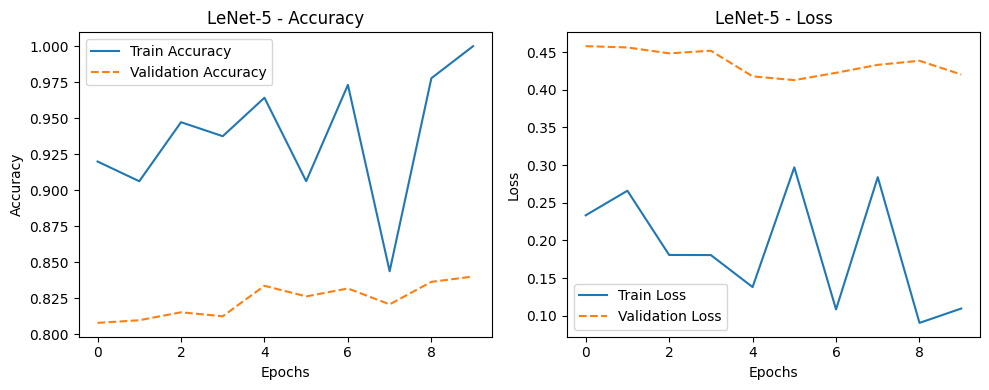

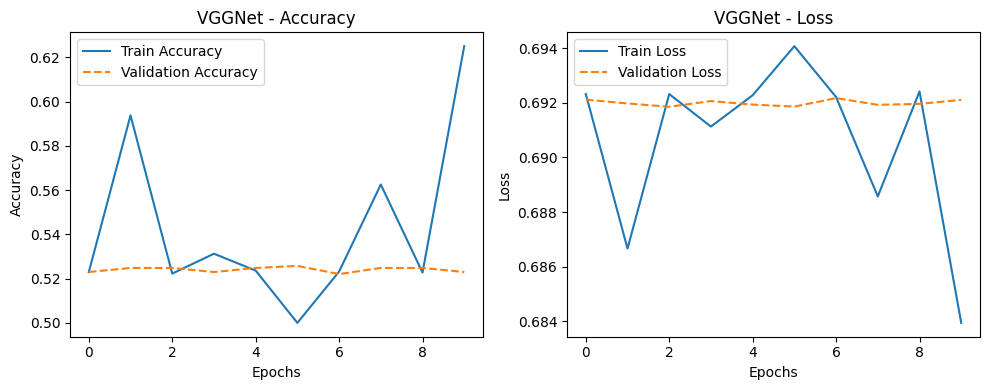

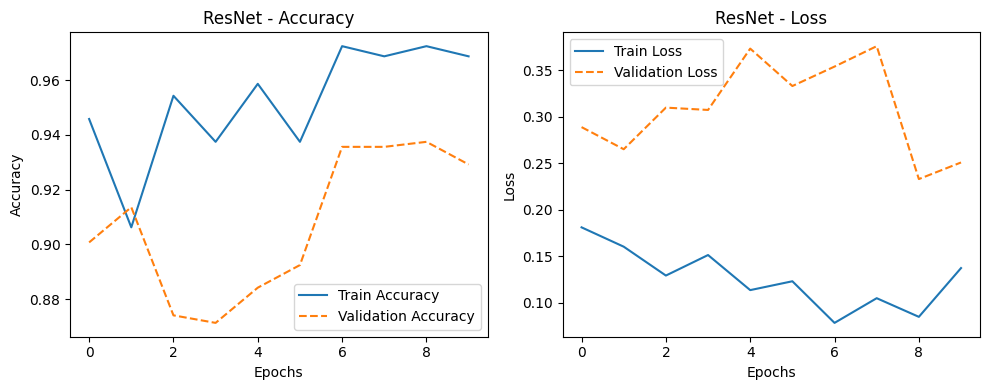

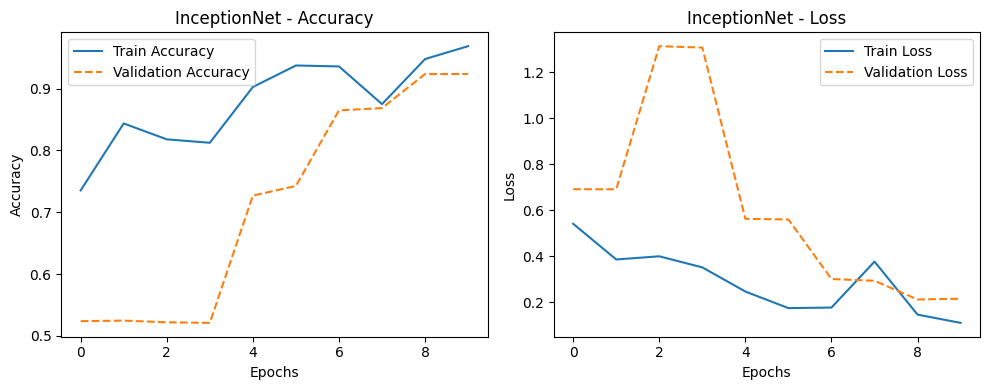

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history_dict):
    for name, history in history_dict.items():
        plt.figure(figsize=(10, 4))

        # Plot Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], linestyle='dashed', label='Validation Accuracy')
        plt.title(f'{name} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], linestyle='dashed', label='Validation Loss')
        plt.title(f'{name} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()  # Show separate plot for each model

plot_graphs(history_dict)


In [30]:
best_model = None
best_accuracy = 0

for name, history in history_dict.items():
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"{name}: Validation Accuracy = {final_val_acc * 100:.2f}%, Loss = {final_val_loss:.4f}")

    # Find the best model
    if final_val_acc > best_accuracy:
        best_accuracy = final_val_acc
        best_model = name

print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy * 100:.2f}%")


LeNet-5: Validation Accuracy = 84.01%, Loss = 0.4202
VGGNet: Validation Accuracy = 52.30%, Loss = 0.6921
ResNet: Validation Accuracy = 92.92%, Loss = 0.2508
InceptionNet: Validation Accuracy = 92.37%, Loss = 0.2145

Best Model: ResNet with Accuracy: 92.92%


In [31]:
# Save the best model
best_model_index = model_names.index(best_model)
best_model_instance = models[best_model_index]
best_model_instance.save(f"{best_model}_model.h5")
print(f"Saved {best_model} model!")


Saved ResNet model!
